In [64]:
!pip3 -q install wordcloud

## Import Libraries

In [65]:
# Importing the required libraries
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import sys
from matplotlib import style
from wordcloud import WordCloud

In [66]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [67]:
pio.templates.default = "simple_white"
px.defaults.template = "plotly_white"

## Read Dataset

In [68]:
df1 = pd.read_csv("noon_perfumes_dataset.csv")

## EDA 

In [69]:
df1.head()

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K


In [70]:
df1.shape

(1003, 15)

In [71]:
df1.describe()

,Unnamed: 0,old_price,new_price,ml,item_rating,seller_rating
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,501.000000,321.176022,149.574307,92.862413,4.530907,14.143170
std,289.685462,234.195846,108.686013,27.496053,0.555504,64.706572
min,0.000000,5.350000,5.350000,1.000000,1.000000,3.500000
25%,250.500000,140.500000,80.325000,80.000000,4.400000,3.800000
50%,501.000000,310.000000,135.000000,100.000000,4.600000,3.900000
75%,751.500000,455.000000,198.525000,100.000000,5.000000,4.200000
max,1002.000000,2350.000000,904.850000,200.000000,5.000000,454.000000


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1003 non-null   int64  
 1   brand               1003 non-null   object 
 2   name                1003 non-null   object 
 3   old_price           1003 non-null   float64
 4   new_price           1003 non-null   float64
 5   ml                  1003 non-null   int64  
 6   concentration       1003 non-null   object 
 7   department          1003 non-null   object 
 8   scents              1003 non-null   object 
 9   base_note           1003 non-null   object 
 10  middle_note         1003 non-null   object 
 11  item_rating         1003 non-null   float64
 12  seller              1003 non-null   object 
 13  seller_rating       1003 non-null   float64
 14  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 117.7+

In [73]:
# Delete Unnamed:0 column
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [74]:
df1['department'].value_counts()

Women          503
Men            433
Unisex          66
Kids Unisex      1
Name: department, dtype: int64

In [75]:
# Merge the record in Kids Unisex into Unisex category
df1['department'].replace({'Kids Unisex':'Unisex'},inplace=True)
df1['department'].value_counts()

Women     503
Men       433
Unisex     67
Name: department, dtype: int64

In [76]:
# Change the seller name
df1['seller'].value_counts()

noon                                                           277
AMLAQ                                                           92
hadayiq baris                                                   52
Star.perfume                                                    45
B.A.G                                                           29
                                                              ... 
Luxury                                                           1
Nuna                                                             1
original                                                         1
Dary.Dar                                                         1
Swiss Arabian PerfumesPRICE UPDATE WITH 15% VAT 1 JULY 2020      1
Name: seller, Length: 117, dtype: int64

In [77]:
df1['seller'].replace({'Swiss Arabian PerfumesPRICE UPDATE WITH 15% VAT 1 JULY 2020':'Swiss Arabian'},inplace=True)

In [78]:
# Correct some values
df1['seller_rating'].value_counts() 

4.2      346
3.9      217
3.7      119
3.8      106
3.5       72
3.6       46
4.1       34
4.3       22
412.0     15
4.4       12
454.0      6
445.0      3
43.0       2
4.8        2
4.0        1
Name: seller_rating, dtype: int64

In [79]:
df1['seller_rating']=df1['seller_rating'].replace({412.0:4.1, 454.0:4.5, 445.0:4.4, 43:4.3})
df1['seller_rating'].value_counts() 

4.2    346
3.9    217
3.7    119
3.8    106
3.5     72
4.1     49
3.6     46
4.3     24
4.4     15
4.5      6
4.8      2
4.0      1
Name: seller_rating, dtype: int64

In [80]:
# Convert names to lower
nn='name'
print(df1[nn].value_counts())

df1[nn]=df1[nn].apply(lambda x:x.lower())
df1[nn].value_counts()

Roses Vanille       8
Pour Homme          8
Uomo                8
Eros                8
Homme               8
                   ..
Guilty Intense      1
Mon Florale         1
Live Luxe           1
Secret De Rochas    1
Layali CPO At       1
Name: name, Length: 594, dtype: int64


roses vanille             8
uomo                      8
pour homme                8
homme                     8
eros                      8
                         ..
milano infusion d'iris    1
guilty intense            1
mon florale               1
live luxe                 1
layali cpo at             1
Name: name, Length: 589, dtype: int64

In [81]:
# Add new columns

df1['discount%']=np.round((df1['new_price']/df1['old_price']*100),decimals=1)
df1['discount_price']=np.round((df1['old_price']-df1['new_price']),decimals=1)
df1['price/ml']=np.round((df1['new_price']/df1['ml']),decimals=1)
df1.head(2)

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,discount%,discount_price,price/ml
0,PACO RABANNE,1 million lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,61.9,150.4,2.4
1,Roberto Cavalli,paradiso assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,26.0,307.0,2.2


In [82]:
df1.columns

Index(['brand', 'name', 'old_price', 'new_price', 'ml', 'concentration',
       'department', 'scents', 'base_note', 'middle_note', 'item_rating',
       'seller', 'seller_rating', 'num_seller_ratings', 'discount%',
       'discount_price', 'price/ml'],
      dtype='object')

In [83]:
# Sort columns in Dataset
df1=df1[['brand', 'name', 'old_price', 'new_price','discount%',
       'discount_price','ml','price/ml', 'concentration',
       'department', 'scents', 'base_note', 'middle_note','item_rating',
       'seller', 'seller_rating', 'num_seller_ratings' ]]
df1.head(2)

,brand,name,old_price,new_price,discount%,discount_price,ml,price/ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,PACO RABANNE,1 million lucky,395.0,244.55,61.9,150.4,100,2.4,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,Roberto Cavalli,paradiso assoluto,415.0,107.95,26.0,307.0,50,2.2,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K


In [84]:
(df1['num_seller_ratings'].value_counts()).head(5)

98.1K    287
135      103
537       61
347       57
122       52
Name: num_seller_ratings, dtype: int64

In [85]:
def edit(tx):
    if tx.rfind('K') != -1 or tx.rfind('k') != -1:
#         print(tx[:5])
        tx=tx.replace('K','')
        tx=tx.replace('k','')
        
        if tx.rfind('.') != -1:
            n1,n2=tx.split('.')
            tx=f'{n1}000'
        else:
            tx=tx+'000'
#         print(tx[:5])    
    return float(tx)  
    
        
df1['num_seller_ratings']= df1['num_seller_ratings'].apply(edit).astype(int)

In [86]:
(df1['num_seller_ratings'].value_counts()).head(5)

98000    289
135      103
537       61
347       57
122       52
Name: num_seller_ratings, dtype: int64

### Visualization

In [87]:
fig = px.imshow(df1.corr().round(2),color_continuous_scale='Inferno',aspect="auto",text_auto=True)
fig.update_layout(title={'text': 'Variables Correlation','y':0.95,'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})

**1-What is the 5 most expensive brands?**

In [88]:
dic={}

for v in range(len(df1)):
    key= df1.iloc[v]['brand']
    val= df1.iloc[v]['new_price']
   
    if key in dic:
        dic[key] +=val
    else:
        dic[key]=val  
                 
exp_df= pd.DataFrame(dic.items(), columns=['brand', 'price']) 
exp_df.sort_values(['price'],ascending=False , inplace=True)

In [89]:
fig = px.pie(exp_df.head(5), values='price', names='brand', title='The 5 most expensive perfume based on brands')
fig.show()

**What is the best-selling perfume category?** 

In [90]:
avg_old_price = df1.groupby('department')['old_price'].mean().reset_index()
avg_new_price = df1.groupby('department')['new_price'].mean().reset_index()

fig = go.Figure(layout={'template':'plotly_white','title':'Average old price vs new price'})
fig = fig.add_trace(go.Bar(x=avg_old_price['department'], y=avg_old_price['old_price'] , name='Average Old Price'))
fig = fig.add_trace(go.Bar(x=avg_new_price['department'], y=avg_new_price['new_price'] , name='Average New Price'))

fig.update_layout(barmode="relative",xaxis_title="Department",yaxis_title="Prices")

fig.show()

***From this plot, it shows:***
- unisex perfume products are not as expensive as male and female ones.
- Women's perfumes are the best sellers.

**What is the note preference of different sexual categories?**

In [91]:
# Split the department column into 3 different categories
men=df1[df1['department']=='Men']
women=df1[df1['department']=='Women']
unisex=df1[df1['department']=='Unisex']

In [92]:
men_base_str=men['base_note'].str.cat(sep=' ')
men_middle_str=men['middle_note'].str.cat(sep=' ')
men_str=men_base_str+men_middle_str
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
men_str_nopunc = ""
for word in men_str:
    if word not in punctuations:
        men_str_nopunc = men_str_nopunc + word
men_str_clean_and=men_str_nopunc.replace(' and ', '')
men_str_clean_And=men_str_clean_and.replace(' And ', '')
men_str_cleaned=men_str_clean_And.replace(' Notes ', '')

In [93]:
#define a fuction to count the number of words in a string
def word_count(str):
    counts = {}
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

men_note_lib=word_count(men_str_cleaned)
sort_men = sorted(men_note_lib.items(), key=lambda x: x[1], reverse=True)

#conver a dictionary to a dataframe
men_note_df=pd.DataFrame(men_note_lib.items(), columns=['note', 'frequency'])
men_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
17,Cedar,120
11,Amber,120
14,Patchouli,116
13,Sandalwood,114
12,Musk,102
32,Vetiver,87
29,Tonka,80
301,Jasmine,70
30,Bean,66
434,Geranium,64


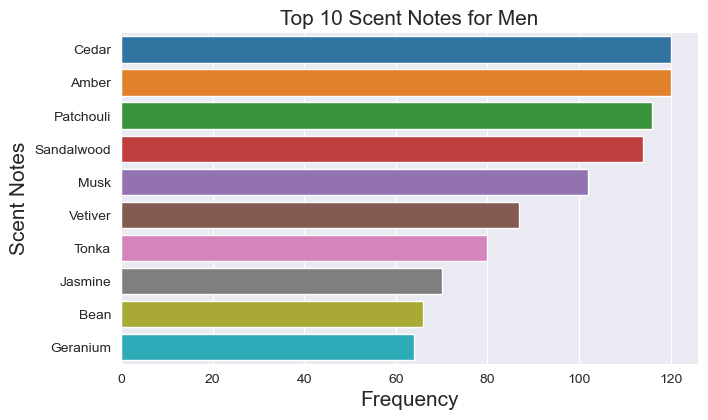

In [94]:
import seaborn as sns
men_note_top10=men_note_df.sort_values('frequency', ascending=False).head(10)
sns.set_style("darkgrid")
sns.catplot(x='frequency', y='note', data=men_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Men',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Scent Notes',fontsize=15)
plt.show()

In [95]:
#prepare for the string of women's notes
women_base_str=women['base_note'].str.cat(sep=' ')
women_middle_str=women['middle_note'].str.cat(sep=' ')
women_str=women_base_str+women_middle_str
women_str_nopunc = ""
for word in women_str:
    if word not in punctuations:
        women_str_nopunc = women_str_nopunc + word
women_str_clean_and=women_str_nopunc.replace(' and ', '')
women_str_clean_And=women_str_clean_and.replace(' And ', '')
women_str_cleaned=women_str_clean_And.replace(' Notes ', '')


#display the top 10 scent notes for women
women_note_lib=word_count(women_str_cleaned)
sort_women = sorted(women_note_lib.items(), key=lambda x: x[1], reverse=True)
women_note_df=pd.DataFrame(women_note_lib.items(), columns=['note', 'frequency'])
women_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
25,Jasmine,198
9,Musk,190
66,Rose,160
0,Vanilla,137
8,Sandalwood,128
16,Amber,124
12,Patchouli,91
124,Blossom,71
383,Orange,64
10,Cedar,62


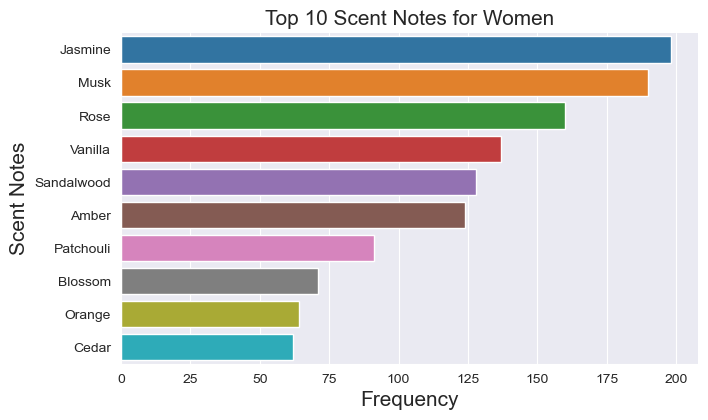

In [96]:
women_note_top10=women_note_df.sort_values('frequency', ascending=False).head(10)
sns.set_style("darkgrid")
sns.catplot(x='frequency', y='note', data=women_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Women',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Scent Notes',fontsize=15)
plt.show()

In [97]:
#prepare for the string of unisex's notes
unisex_base_str=unisex['base_note'].str.cat(sep=' ')
unisex_middle_str=unisex['middle_note'].str.cat(sep=' ')
unisex_str=unisex_base_str+unisex_middle_str
unisex_str_nopunc = ""
for word in unisex_str:
    if word not in punctuations:
        unisex_str_nopunc = unisex_str_nopunc + word
unisex_str_clean_and=unisex_str_nopunc.replace(' and ', '')
unisex_str_clean_And=unisex_str_clean_and.replace(' And ', '')
unisex_str_cleaned=unisex_str_clean_And.replace(' Notes ', '')

#display the top 10 scent notes for unisex
unisex_note_lib=word_count(unisex_str_cleaned)
sort_unisex = sorted(unisex_note_lib.items(), key=lambda x: x[1], reverse=True)
unisex_note_df=pd.DataFrame(unisex_note_lib.items(), columns=['note', 'frequency'])
unisex_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
5,Amber,26
8,Musk,22
15,Sandalwood,15
9,Vanilla,14
70,Rose,14
21,Patchouli,13
106,Jasmine,13
22,Cedar,9
4,Wood,9
49,Woody,6


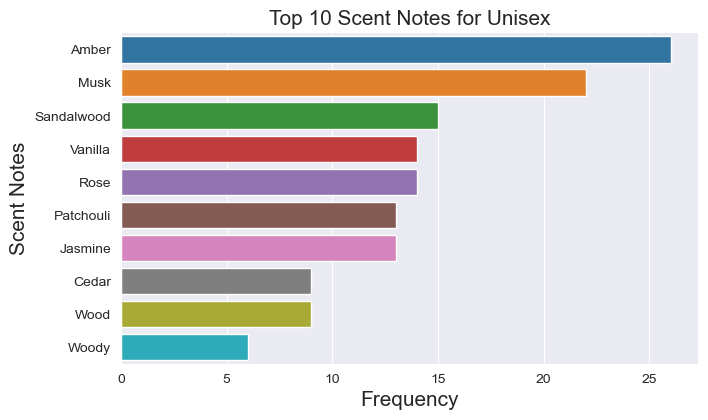

In [98]:
unisex_note_top10=unisex_note_df.sort_values('frequency', ascending=False).head(10)
sns.set_style("darkgrid")
sns.catplot(x='frequency', y='note', data=unisex_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Unisex',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Scent Notes',fontsize=15)
plt.show()

**Top 5 scent notes per category are as below.**

- **Men -** Cedar, Amber, Patchouli, Sandalwood, Musk
- **Women -** Jasmine, Musk, Rose, Vanilla, Sandalwood
- **Unisex -** Amber, Musk, Rose, Sandalwood, Vanilla


**What is the average discount for the 10 most scents?**

In [99]:
df2 = df1.copy()
df2 = df1[df1['discount%'] < 100]
mean = df2.groupby('scents')['discount%'].mean()

mean.index
df3 = mean.reset_index()
df3['discount%'] = df3['discount%'].round(decimals=2)
df3 = df3.sort_values(by='discount%',ascending=False).head(10)

fig = px.bar(df3, x='scents', y='discount%', title='10 Most Discounted Scents',color_discrete_sequence=px.colors.qualitative.Vivid,color='scents',labels={'discount%':'Average discount ','scents':'Scents'})
fig.show()

**What is the average rating for the 10 most scents?**

In [100]:
df2 = df1.copy()
mean = df1.groupby('scents')['item_rating'].mean()
df3 = mean.reset_index()
df3['item_rating'] = df3['item_rating'].round(decimals=2)
df3 = df3.sort_values('item_rating',ascending=False).head(10)
fig = px.bar(df3,x='scents',y='item_rating',color_discrete_sequence=px.colors.qualitative.Vivid,color='scents',text='item_rating')
fig.update_layout(title={'text': 'Top 10 Rated Scents','y':0.95,'x':0.5, 'xanchor': 'center', 'yanchor': 'top' })
fig.show()

### Machine Learning

In [101]:
from sklearn import preprocessing

'''
co = ['old_price', 'new_price', 'ml', 'concentration',
       'department', 'base_note', 'middle_note', 'discount%',
       'discount_price', 'price/ml']
'''
co1 = ['old_price', 'new_price','ml','price/ml']
co2 = ['brand', 'concentration', 'department', 'base_note','middle_note']
X = df1[co2]
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
X.head()

,brand,concentration,department,base_note,middle_note
0,114,2,0,403,241
1,130,1,2,637,697
2,131,1,1,318,595
3,56,2,0,142,49
4,130,1,2,645,0


In [102]:
X[co1]=df1[co1]
X.head()

,brand,concentration,department,base_note,middle_note,old_price,new_price,ml,price/ml
0,114,2,0,403,241,395.0,244.55,100,2.4
1,130,1,2,637,697,415.0,107.95,50,2.2
2,131,1,1,318,595,265.0,186.90,100,1.9
3,56,2,0,142,49,290.0,103.20,100,1.0
4,130,1,2,645,0,260.0,94.95,50,1.9


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X  = sc.fit_transform(X.values) 

In [104]:
le2 = preprocessing.LabelEncoder()
y=df1[['scents']] 
y = y.apply(le2.fit_transform) 
y.head() 

,scents
0,18
1,5
2,0
3,15
4,0


In [105]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 0) 
X.shape 

(1003, 9)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logmodel = LogisticRegression() 
logmodel 

LogisticRegression()

In [107]:
logmodel.fit(X_train,y_train) 

LogisticRegression()

In [108]:
logmodel.score(X_test,y_test) 

0.4158415841584158

In [109]:
from sklearn.svm import SVC 
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(X_train, y_train) 


res = clf.score(X_test,y_test) 
print(res) 

0.4158415841584158


In [111]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier()  
rfc.fit(X_train, y_train)  
rfc_pred = rfc.predict(X_test)  
print(classification_report(y_test,rfc_pred))  

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         2
           3       0.43      0.75      0.55         4
           5       0.63      0.81      0.71        32
           6       1.00      1.00      1.00         1
           7       0.40      0.40      0.40         5
           8       0.56      0.42      0.48        12
          10       1.00      0.50      0.67         2
          11       0.50      0.25      0.33         4
          15       0.80      0.73      0.76        11
          17       1.00      1.00      1.00         2
          18       0.61      0.55      0.58        20

    accuracy                           0.63       101
   macro avg       0.64      0.59      0.60       101
weighted avg       0.63      0.63      0.62       101



In [112]:
print(confusion_matrix(y_test,rfc_pred))  

[[ 4  0  0  1  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  3  0  0  0  0  0  0  1  0  0]
 [ 0  0  1 26  0  2  3  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1  0  2]
 [ 0  0  0  5  0  0  5  0  0  0  0  2]
 [ 0  0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  1  0  0  1]
 [ 0  0  0  1  0  0  0  0  1  8  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  3  5  0  1  0  0  0  0  0 11]]


In [59]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

classifiers = [
    LogisticRegression(),
    svm.SVC(),
    RandomForestClassifier(),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    ]



for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    print(clf.score(X_test,y_test),'\n')

LogisticRegression()
0.4158415841584158 

SVC()
0.4158415841584158 

RandomForestClassifier()
0.6534653465346535 

LinearDiscriminantAnalysis()
0.40594059405940597 

KNeighborsClassifier()
0.38613861386138615 

GaussianNB()
0.36633663366336633 

DecisionTreeClassifier()
0.6138613861386139 



### Regression

In [60]:
from sklearn.model_selection import train_test_split

X=df1[['old_price']].values
y=df1[['new_price']].values


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 40) 
X.shape 

(1003, 1)

In [61]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]


for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    rfc_pred = clf.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, rfc_pred))
    print('MSE:', metrics.mean_squared_error(y_test, rfc_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))
    print("-----------------------------------------------------------")

SVR()
MAE: 55.650678193769224
MSE: 10050.588276490565
RMSE: 100.2526222923399
-----------------------------------------------------------
SGDRegressor()
MAE: 25537358921760.49
MSE: 9.705699569489799e+26
RMSE: 31153971768443.586
-----------------------------------------------------------
BayesianRidge()
MAE: 43.39273766259503
MSE: 4148.337517178778
RMSE: 64.4075889719432
-----------------------------------------------------------
LassoLars()
MAE: 50.313325206442606
MSE: 5514.660357319472
RMSE: 74.26075920241774
-----------------------------------------------------------
ARDRegression()
MAE: 43.392737662595025
MSE: 4148.337517178778
RMSE: 64.4075889719432
-----------------------------------------------------------
PassiveAggressiveRegressor()
MAE: 46.113309203517616
MSE: 4506.797783873376
RMSE: 67.13268789400121
-----------------------------------------------------------
TheilSenRegressor(max_subpopulation=10000)
MAE: 42.846155920572336
MSE: 4166.551791311349
RMSE: 64.54883260998102
----

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,mean_absolute_error

rfc = LinearRegression()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rfc_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

MAE: 43.38679436056637
MSE: 4147.385233005436
RMSE: 64.40019590812932


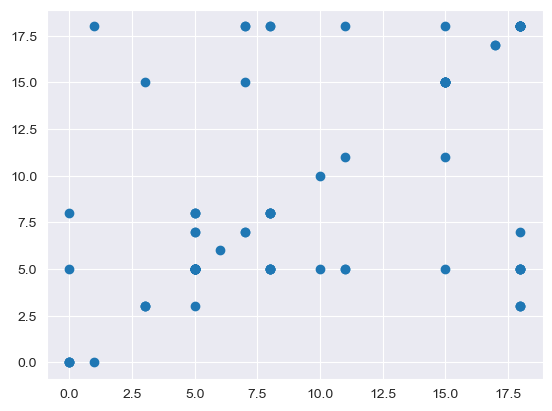

In [113]:
plt.scatter(y_test,rfc_pred);